In [1]:
import pickle
import os
import pandas as pd
import seaborn as sns

In [2]:
results = []
for dock_id in os.listdir('gold_docking_postprocessing_random') :
    result_path = os.path.join('gold_docking_postprocessing_random', dock_id, 'results.p')
    if os.path.exists(result_path) :
        with open(result_path, 'rb') as f :
            result_d = pickle.load(f)
            results.append(result_d)

In [3]:
len(results)

952

In [4]:
rankers = ['score', 'energy', 'model_scaffold_split', 'model_random_split']
df = pd.DataFrame()
for result in results :
    for ranker in rankers :
        result['ranking'][ranker]['ranker'] = ranker
        df = df.append(result['ranking'][ranker], ignore_index=True)

In [5]:
df.head()

,best_pose,docking_power,min_rmsd,min_rmsd_top_pose,ranker,top_score,top_score_pose
0,<rdkit.Chem.rdchem.Mol object at 0x7f3f75a1be70>,1.0,1.072826,1.307922,score,114.2696,<rdkit.Chem.rdchem.Mol object at 0x7f3f75a1bd70>
1,<rdkit.Chem.rdchem.Mol object at 0x7f3f72ab65f0>,0.0,1.448958,2.042476,energy,78.7452,<rdkit.Chem.rdchem.Mol object at 0x7f3f72ab66f0>
2,<rdkit.Chem.rdchem.Mol object at 0x7f3f72a9c4b0>,1.0,1.072826,1.072826,model_scaffold_split,88.4488,<rdkit.Chem.rdchem.Mol object at 0x7f3f75a1bfb0>
3,<rdkit.Chem.rdchem.Mol object at 0x7f3f75a1d330>,1.0,1.138545,1.307922,model_random_split,114.2696,<rdkit.Chem.rdchem.Mol object at 0x7f3f75a1d2f0>
4,None,0.0,0.971691,8.572833,score,52.8267,None


<AxesSubplot:xlabel='ranker', ylabel='top_score'>

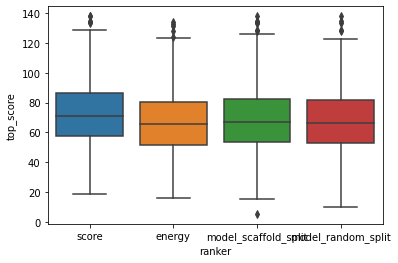

In [6]:
sns.boxplot(data=df, x='ranker', y='top_score')

<AxesSubplot:xlabel='ranker', ylabel='min_rmsd'>

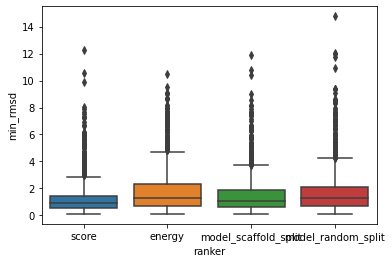

In [7]:
sns.boxplot(data=df, x='ranker', y='min_rmsd')

<AxesSubplot:xlabel='ranker', ylabel='docking_power'>

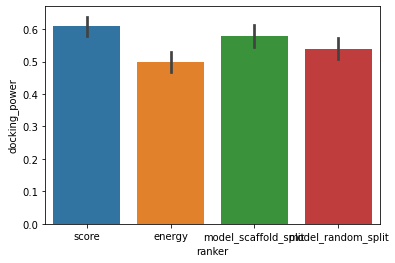

In [8]:
sns.barplot(data=df, x='ranker', y='docking_power')